### Loading Brian's Macy's SEO Data

In [163]:
import pandas as pd

In [14]:
wedding_df = pd.read_csv("Wedding Keyword Scrape.csv")
wedding_df.head()

,Keyword,Rank,Title,Link,Description
0,wedding gifts,1,"Unique Wedding Gifts, Cool Gift Ideas | Uncomm...",www.uncommongoods.com/occasions/wedding-gifts,Discover unique wedding gifts at UncommonGoods...
1,wedding gifts,2,Wedding Gifts: Unique Bride &amp; Groom Gifts ...,www.personalizationmall.com/Personalized-Weddi...,Find the best collection of personalized weddi...
2,wedding gifts,3,Personalized Wedding Gifts at Things Remembered,www.thingsremembered.com/section/Wedding/2114.uts,Personalized wedding gifts that will make this...
3,wedding gifts,4,Popular items for wedding gift on Etsy,https://www.etsy.com/market/wedding_gift,"Shop outside the big box, with unique items fo..."
4,wedding gifts,5,ENGAGEMENT &amp; WEDDING GIFTS - Gifts.com,https://www.gifts.com/ideas/wedding,"When you think about it, buying a wedding gift..."


### Total Number of Sites

In [41]:
len(wedding_df)

1411

### Number of Strange Link Names

In [75]:
def is_strange(link) : return "." not in link

print sum(wedding_df.Link.apply(is_strange))

52


In [76]:
print wedding_df.Link[wedding_df.Link.apply(is_strange)].unique()

['No link found' 'Cambio' 'E! Online']


### Top-level Domains

In [83]:
pd.DataFrame({'top_level_domain': ['.com', '.org', '.edu', '.co', '.ca', '.st', '205.153.117.210'],
              'count': [1320, 12, 2, 22, 1, 1, 1]},
            columns = ['top_level_domain', 'count'])

,top_level_domain,count
0,.com,1320
1,.org,12
2,.edu,2
3,.co,22
4,.ca,1
5,.st,1
6,205.153.117.210,1


### Most Frequently Appearing Domains

In [99]:
from tld import get_tld

def parse_topleveldomain(link):
    if (not link.startswith("http") ) and ( not is_strange(link) ):
        link = "http://" + link
        
    try:
        return get_tld(link)
    except:
        return link

wedding_df['Domain'] = wedding_df.Link.apply(parse_topleveldomain)

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.mpl_style = 'default'
sns.set_palette("deep", desat=.6)

MAX_NUM_CATEGORIES_TO_USE_BAR = 50

In [211]:
vc = wedding_df['Domain'].value_counts()
ordered_index = vc.index
ordered_index = ordered_index[:MAX_NUM_CATEGORIES_TO_USE_BAR]

ax = vc[reversed(ordered_index)].plot(kind='barh',
                                      figsize=(8, min(max(4, np.ceil(len(vc.values)/4.0)), 24)),
                                      title="Most Frequently Appeared Domains (first {0})\n\n".format(MAX_NUM_CATEGORIES_TO_USE_BAR),
                                      width=1.0)
ax.tick_params(labeltop=True)
ax.set_xlabel("Frequency")
ax.xaxis.set_label_position('top') 
 
# annotate bar counts
for x,y in zip(range(len(vc)), vc[reversed(ordered_index)].values):
    (xlim_min, xlim_max) = ax.get_xlim()
    
    if y > xlim_max*0.9:
        ax.annotate(str(y),xy=(y*.95,x), color="white")
    else:
        ax.annotate(str(y),xy=(y*1.1,x), color="black")
    
    # %%show a scale of percentage proportions on right y-axis
    total_count = sum(vc[reversed(ordered_index)].values)
    percentage_proportions = (100.0*vc[reversed(ordered_index)].values) / total_count
    percentage_proportions = map(lambda p : "%.2f%%" % p, percentage_proportions)
    for_right_yaxis = ax.twinx()
    for_right_yaxis.set_yticks(ax.get_yticks())
    for_right_yaxis.set_yticklabels(percentage_proportions)
    for_right_yaxis.set_ylim(ax.get_ylim())
    for_right_yaxis.grid(False)
    
xmacys = vc.index.tolist().index('macys.com')
    
plt.savefig("most_frequently_appeared_domains.png", format="png")
plt.close()

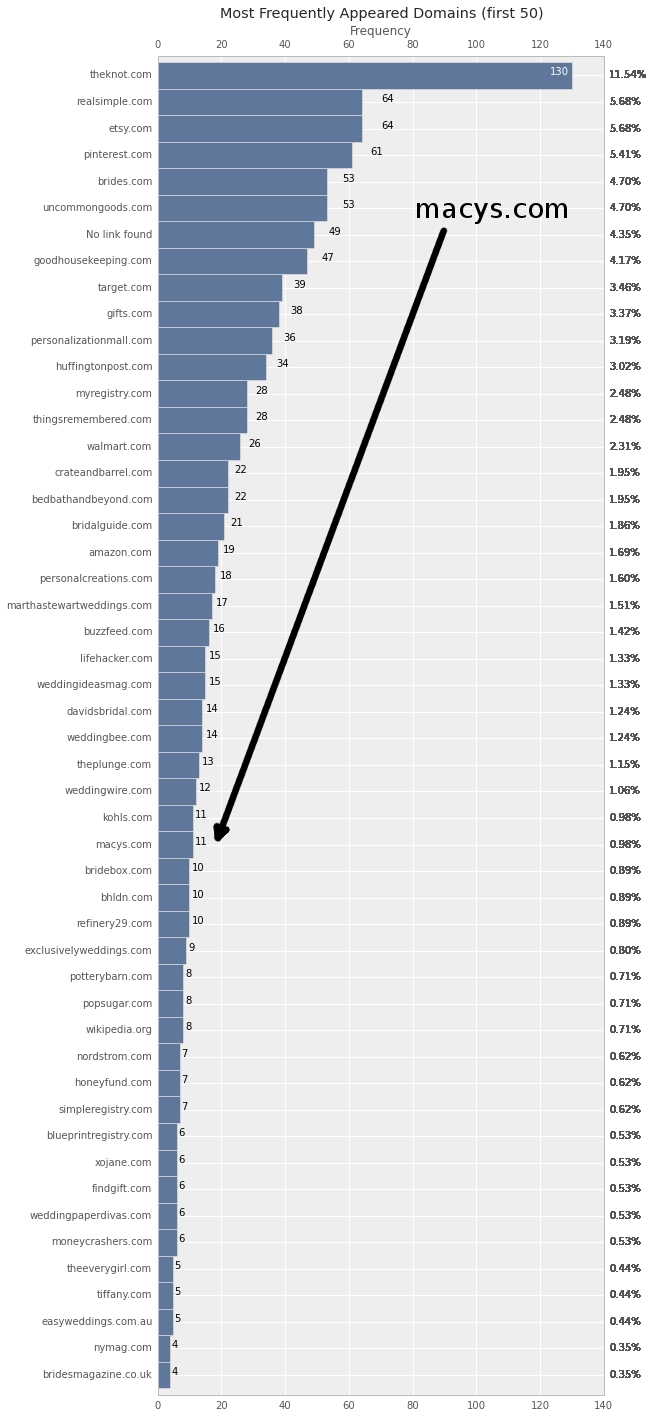

In [210]:
Image("./wedding_bar.png")

### Macy's Rankings

* only 11 out of the 1411 records
* "wedding registry" brings up the best rank for https://www.macys.com/wedding-registry
* plural "gifts" is bad
* singular "gift" is better than registry
* but place "wedding" before "gift"

In [261]:
macys_df = wedding_df[wedding_df.Domain=='macys.com']
macys_df.sort('Rank')

,Keyword,Rank,Title,Link,Description,Domain
1054,wedding registry gift,4,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1094,wedding and gift registry,4,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1175,gift registry search,5,Registry Search - Macy's,www.macys.com/registry/wedding/registrysearch,back to macys.com; help; rewards program · reg...,macys.com
35,wedding gift registry,6,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
45,wedding registry finder,6,Registry Search - Macy's,www.macys.com/registry/wedding/registrysearch,back to macys.com; help; rewards program · reg...,macys.com
1087,gift registry wedding,7,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1107,at home gift registry,7,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
28,wedding registry,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"Extra 15 percent off, Extra 10 percent off ele...",macys.com
938,wedding gift registries,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
975,wedding gifts registry,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com


In [250]:
n_ratings = len(wedding_df.Rank.unique())

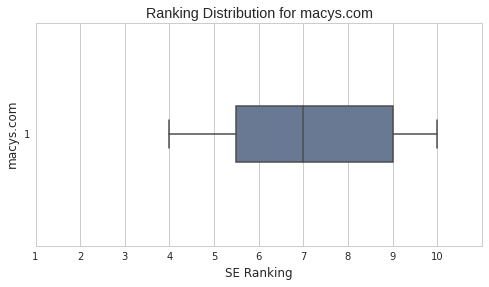

In [260]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(macys_df.Rank.values, vert=False, widths=0.25)
ax.set_xlim((1, n_ratings+1))
ax.set_xticks(range(1, n_ratings+1));
ax.set_title("Ranking Distribution for macys.com")
ax.set_ylabel("macys.com")
ax.set_xlabel("SE Ranking")

### Keywords vs Rankings

In [280]:
sum(wedding_df.Keyword=="gift")

0

In [283]:
import nltk

def lowercase_and_tokenize(s):
    s = s.lower()
    #s = s.translate(None, string.punctuation)
    token_list = nltk.word_tokenize(s)
    return token_list

def concatenate_and_preprocess_and_tokenize_keywords(sub_dataframe):
    s = sub_dataframe.Keyword.sum()
    return s#lowercase_and_tokenize(s)

rank_vs_keyword = wedding_df[['Keyword', 'Rank']].groupby('Rank').apply(concatenate_and_preprocess_and_tokenize_keywords)
rank_vs_keyword

Rank
1       wedding giftswedding gift ideaswedding registr...
2       wedding giftswedding gift ideaswedding registr...
3       wedding giftswedding gift ideaswedding registr...
4       wedding giftswedding gift ideaswedding registr...
5       wedding giftswedding gift ideaswedding registr...
6       wedding giftswedding gift ideaswedding registr...
7       wedding giftswedding gift ideaswedding registr...
8       wedding giftswedding gift ideaswedding registr...
9       wedding giftswedding gift ideaswedding registr...
10      wedding giftswedding gift ideaswedding registr...
dtype: object

### Wordclouds of Rankings' Descriptions

In [ ]:
stars_vs_cat_texts = wedding_df[.groupby('review_stars').apply(concatenate_and_preprocess_and_tokenize_review_texts)



### Tips for Exploring Text Data
http://blog.kaggle.com/2015/08/18/crowdflower-scripts-approaching-nlp/

### Macy's Similarity (MDS)

### LDA Visualization
http://cpsievert.github.io/LDAvis/reviews/reviews.html

In [215]:
%load_ext rpy2.ipython

In [216]:
%%R
data(reviews, package = "LDAvisData")

Error in find.package(package, lib.loc, verbose = verbose) : 
  there is no package called ‘LDAvisData’


In [221]:

wedding_df.Description

for i in range(n_ratings):
    

0     Discover unique wedding gifts at UncommonGoods...
1     Find the best collection of personalized weddi...
2     Personalized wedding gifts that will make this...
3     Shop outside the big box, with unique items fo...
4     When you think about it, buying a wedding gift...
5                                  No description found
6     Need an idea for wedding gifts? At crateandbar...
7     Let these unique and unexpected finds guide yo...
8     If you're shopping for a present that's more p...
9     Shop Pottery Barn for wedding gift ideas. Find...
10    Let these unique and unexpected finds guide yo...
11    If you're shopping for a present that's more p...
12    Discover unique wedding gifts at UncommonGoods...
13    When it comes to wedding gifts, some couples a...
14    Shop outside the big box, with unique items fo...
...
1396    May 17, 2013 ... Today we're showing you some ...
1397    Great ceremony samples to help couples with wo...
1398    Just like those university paper

In [217]:
%%R -i n_ratings
rainbow(n_ratings)

 [1] "#FF0000FF" "#FF9900FF" "#CCFF00FF" "#33FF00FF" "#00FF66FF" "#00FFFFFF"
 [7] "#0066FFFF" "#3300FFFF" "#CC00FFFF" "#FF0099FF"
